# Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 20

## Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Documents/CSV/laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3...,4.2,"₹36,990",Intel Core i3 Pr...
1,Lenovo IdeaPad 3...,4.2,"₹39,990",Intel Core i3 Pr...
2,ASUS VivoBook 15...,4.3,"₹32,990",Intel Core i3 Pr...
3,HP Pavilion Ryze...,4.4,"₹49,990",AMD Ryzen 5 Hexa...
4,ASUS TUF Gaming ...,4.4,"₹49,990",Intel Core i5 Pr...


In [4]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  720 non-null    object 
 1   rating   581 non-null    float64
 2   mrp      720 non-null    object 
 3   feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


## Feature engineering

There seem to be some nulls in 'Rating'. Perhaps they can be filled by the median 'Rating' of their specific brands.

But it needs to wait, we first need further cleaning.

Features required
- RAM size and type
- Storage size and type
- Processor
- OS
- Display size
- Display tech (maybe?)
- Has touchscreen
- Warranty
- Brand (maybe?)
- Model (maybe?)

### Clean columns

In [5]:
df['mrp'] = df['mrp'].str.replace(',', '').str.replace('₹', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  720 non-null    object 
 1   rating   581 non-null    float64
 2   mrp      720 non-null    float64
 3   feature  720 non-null    object 
dtypes: float64(2), object(2)
memory usage: 22.6+ KB


### Data samples

In [6]:
print(df['product'][3])
print(df['product'][355])
print(df['product'][179])
print(df['product'][430])
print(df['product'][713])
print(df['product'][266])

HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...
DELL Vostro Core i3 10th Gen - (8 GB/512 GB SSD/Windows 10) Vostro 3401 Thin and Light Laptop
Lenovo Yoga 6 Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD/Windows 10 Home) 13ALC6 Thin and Light Lapto...
Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD R7-5800H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
DELL Core i5 12th Gen - (16 GB/512 GB SSD/Windows 11 Home) Inspiron 5320 Thin and Light Laptop
RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop


In [7]:
print(df['feature'][3])
print(df['feature'][355])
print(df['feature'][179])
print(df['feature'][713])

AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty
Processor: 10th Generation Intel Core i3-1005G1 Processor (4MB Cache, up to 3.4 GHz)RAM & Storage:8GB RAM | 512GB M.2 PCIe NVMe Solid State DriveDisplay:14.0-inch FHD (1920 x 1080) Anti-glare LED Backlight Narrow Border WVA DisplayGraphics:Intel UHD Graphics with shared graphics memoryOperating System & Software:Windows 10 Home Single Language | Microsoft Office Home and Student 2019Ports: USB 3.2 Gen 1 (x2), USB2.0 (x1), HDMI 1.4,SD Media Card Reader (SD, SDHC, SDXC), RJ45 - 10/100/1000Mbps GbEIntel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD35.56 cm (14 Inch) DisplayMicrosoft Office Home and Student 20191 Year Onsite Warranty
AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD33.78 cm (13

### Extracting features

#### Brand

In [8]:
df['brand'] = [i[0] for i in df['product'].str.split(' ')]
df['brand'] = df['brand'].str.upper()
df['brand'].unique()

array(['LENOVO', 'ASUS', 'HP', 'DELL', 'REDMIBOOK', 'REALME', 'ACER',
       'MSI', 'APPLE', 'INFINIX', 'SAMSUNG', 'ULTIMUS', 'VAIO',
       'GIGABYTE', 'NOKIA', 'ALIENWARE'], dtype=object)

#### RAM, OS and Storage

In [9]:
import re

regex = r'.*\((.+?)/(.+?(GB|TB)) .*/(WIN|MAC OS|CHROME OS|DOS).*'

df['product'] = df['product'].str.upper()

df['ram_space']     = df['product'].apply( lambda x: re.search(regex, x).group(1) )
df['storage_space'] = df['product'].apply( lambda x: re.search(regex, x).group(2) )
df['os']            = df['product'].apply( lambda x: re.search(regex, x).group(4) )

print(df['ram_space'].unique())
print(df['storage_space'].unique())
print(df['os'].unique())

['8 GB' '16 GB' '4 GB' '32 GB']
['256 GB' '512 GB' '1 TB' '128 GB' '64 GB' '32 GB' '2 TB']
['WIN' 'MAC OS' 'DOS' 'CHROME OS']


In [10]:
regex = r'.*(HDD|SSD).*'

df['storage_type'] = df['product'].apply( lambda x: re.search(r'.*(HDD|SSD|EMMC).*', x).group(1) )
df['storage_type'].unique()

array(['SSD', 'EMMC', 'HDD'], dtype=object)

#### Notes
 
- A good amount of data in 'Product' was incomplete. The '...' when `pd.options.display.max_colwidth = 100000` doesn't indicate partially shown data, the data actually contains '...'
- There at 4 OSs: WIN, MAC OS, CHROME OS, DOS.
- There are many storage types, including SSD and EMMC
- Storage space can be in GB or TB

#### RAM type

In [11]:
df['feature'] = df['feature'].str.upper()
regex = r'.*(LPDDR3|LPDDR4|LPDDR5|UNIFIED|DDR4|DDR5).*'

df['ram_type'] = df['feature'].apply( lambda x: re.search(regex, x).group(1) )
df['ram_type'].unique()

array(['DDR4', 'DDR5', 'UNIFIED', 'LPDDR3'], dtype=object)

RAM types can be any variation of DDR or UNIFIED as w/ the Mac M chips.

#### CPU

In [12]:
regex = r'.*(INTEL .*|RYZEN .*|APPLE M\d.*|AMD .*|QUALCOMM .*) PROCESSOR.*'

df['cpu'] = df['feature'].apply( lambda x: re.search(regex, x).group(1) )
df['cpu'].unique()

array(['INTEL CORE I3', 'RYZEN 5 HEXA CORE', 'INTEL CORE I5',
       'RYZEN 7 QUAD CORE', 'RYZEN 5 QUAD CORE', 'RYZEN 9 OCTA CORE',
       'RYZEN 7 OCTA CORE', 'APPLE M1', 'INTEL CELERON DUAL CORE',
       'RYZEN 3 DUAL CORE', 'AMD ATHLON DUAL CORE', 'RYZEN 3 QUAD CORE',
       'APPLE M2', 'INTEL CELERON QUAD CORE', 'INTEL CORE I7',
       'APPLE M1 PRO', 'QUALCOMM SNAPDRAGON 7C GEN 2',
       'INTEL PENTIUM SILVER', 'APPLE M1 MAX', 'INTEL CORE I9',
       'RYZEN 5 DUAL CORE', 'INTEL PENTIUM QUAD CORE', 'AMD DUAL CORE',
       'RYZEN 3 HEXA CORE'], dtype=object)

Processor brands include Intel, Ryzen, AMD, Apple, and Qualcomm.

#### Display size

In [13]:
regex = r'.*(\d\d(\.\d+)?[ -]INCH|\d\d(\.\d+)?").*'

df['display_size'] = df['feature'].apply( lambda x: re.search(regex, x).group(1) )
df['display_size'] = df['display_size'].str.replace(' ', '')
df['display_size'] = df['display_size'].str.replace('"', '')
df['display_size'] = df['display_size'].str.replace('-', '')
df['display_size'] = df['display_size'].str.replace('INCH', '')
df['display_size'] = df['display_size'].astype(float).astype(str)

In [14]:
print(df['display_size'].unique())
print(df[df['display_size'] == '96.0']['feature'])
print(df['feature'][382])

# 382 looks incorrect so gonna manually set it
df['display_size'][382] = '14.96'

['14.0' '15.6' '17.3' '13.3' '14.2' '13.6' '16.0' '16.1' '16.2' '14.1'
 '13.4' '11.6' '15.0' '13.0' '96.0' '13.5' '16.6']
382    INTEL CORE I3 PR...
Name: feature, dtype: object
INTEL CORE I3 PROCESSOR (11TH GEN)8 GB DDR4 RAM64 BIT WINDOWS 11 OPERATING SYSTEM256 GB SSD38.0 CM (14.96 INCH) DISPLAYMICROSOFT OFFICE HOME AND STUDENT 20211 YEAR ONSITE WARRANTY


<ipython-input-14-0b80e8e662f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['display_size'][382] = '14.96'


In [15]:
df['display_size'].unique()

array(['14.0', '15.6', '17.3', '13.3', '14.2', '13.6', '16.0', '16.1',
       '16.2', '14.1', '13.4', '11.6', '15.0', '13.0', '14.96', '13.5',
       '16.6'], dtype=object)

In [16]:
df.head()

,product,rating,mrp,feature,brand,ram_space,storage_space,os,storage_type,ram_type,cpu,display_size
0,LENOVO IDEAPAD 3...,4.2,36990.0,INTEL CORE I3 PR...,LENOVO,8 GB,256 GB,WIN,SSD,DDR4,INTEL CORE I3,14.0
1,LENOVO IDEAPAD 3...,4.2,39990.0,INTEL CORE I3 PR...,LENOVO,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I3,15.6
2,ASUS VIVOBOOK 15...,4.3,32990.0,INTEL CORE I3 PR...,ASUS,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I3,15.6
3,HP PAVILION RYZE...,4.4,49990.0,AMD RYZEN 5 HEXA...,HP,8 GB,512 GB,WIN,SSD,DDR4,RYZEN 5 HEXA CORE,15.6
4,ASUS TUF GAMING ...,4.4,49990.0,INTEL CORE I5 PR...,ASUS,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I5,15.6


#### Touchscreen

In [17]:
regex = r'.*(TOUCH).*'

df['touch_screen'] = df['feature'].apply( lambda x: 'YES' if re.search(regex, x) else 'NO' )

#### Warranty

In [18]:
regex = r'.*(\d+[ ](Y|M)).*'

df['warranty'] = df['feature'].apply( lambda x: re.search(regex, x).group(1) )
df['warranty'].unique()

array(['2 Y', '1 Y', '6 M', '2 M'], dtype=object)

#### Newly added

In [19]:
df.head()

,product,rating,mrp,feature,brand,ram_space,storage_space,os,storage_type,ram_type,cpu,display_size,touch_screen,warranty
0,LENOVO IDEAPAD 3...,4.2,36990.0,INTEL CORE I3 PR...,LENOVO,8 GB,256 GB,WIN,SSD,DDR4,INTEL CORE I3,14.0,NO,2 Y
1,LENOVO IDEAPAD 3...,4.2,39990.0,INTEL CORE I3 PR...,LENOVO,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I3,15.6,NO,2 Y
2,ASUS VIVOBOOK 15...,4.3,32990.0,INTEL CORE I3 PR...,ASUS,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I3,15.6,NO,1 Y
3,HP PAVILION RYZE...,4.4,49990.0,AMD RYZEN 5 HEXA...,HP,8 GB,512 GB,WIN,SSD,DDR4,RYZEN 5 HEXA CORE,15.6,NO,1 Y
4,ASUS TUF GAMING ...,4.4,49990.0,INTEL CORE I5 PR...,ASUS,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I5,15.6,NO,1 Y


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product        720 non-null    object 
 1   rating         581 non-null    float64
 2   mrp            720 non-null    float64
 3   feature        720 non-null    object 
 4   brand          720 non-null    object 
 5   ram_space      720 non-null    object 
 6   storage_space  720 non-null    object 
 7   os             720 non-null    object 
 8   storage_type   720 non-null    object 
 9   ram_type       720 non-null    object 
 10  cpu            720 non-null    object 
 11  display_size   720 non-null    object 
 12  touch_screen   720 non-null    object 
 13  warranty       720 non-null    object 
dtypes: float64(2), object(12)
memory usage: 78.9+ KB


### Null Ratings

In [21]:
for lbl, grp in df.groupby('brand'):
    print(lbl, len(grp), grp['rating'].isnull().sum())

ACER 35 2
ALIENWARE 3 0
APPLE 19 0
ASUS 251 82
DELL 61 18
GIGABYTE 1 1
HP 61 12
INFINIX 20 0
LENOVO 196 16
MSI 30 6
NOKIA 1 0
REALME 6 0
REDMIBOOK 31 0
SAMSUNG 2 0
ULTIMUS 2 2
VAIO 1 0


#### Notes
- GIGABYTE has only one laptop and has nan rating.
- ULTIMUS has 2 laptops, both have nan rating.
- Let's calculate rating as median of brand ratings.
- For GIGABYTE and ULTIMUS, we'll set them as median of their price range.

#### Filling null

In [22]:
df['rating'] = df['rating'].fillna(
    df['brand'].map(
        df.groupby('brand')['rating'].median()
    )
)
df['rating'].isnull().sum()

3

In [23]:
mrp_ranges = pd.cut(df['mrp'], 40)
df['rating'] = df['rating'].fillna(
    mrp_ranges.map(
        df.groupby(mrp_ranges)['rating'].median()
    )
)
df['rating'].isnull().sum()

0

## New Features

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product        720 non-null    object 
 1   rating         720 non-null    float64
 2   mrp            720 non-null    float64
 3   feature        720 non-null    object 
 4   brand          720 non-null    object 
 5   ram_space      720 non-null    object 
 6   storage_space  720 non-null    object 
 7   os             720 non-null    object 
 8   storage_type   720 non-null    object 
 9   ram_type       720 non-null    object 
 10  cpu            720 non-null    object 
 11  display_size   720 non-null    object 
 12  touch_screen   720 non-null    object 
 13  warranty       720 non-null    object 
dtypes: float64(2), object(12)
memory usage: 78.9+ KB


In [25]:
df.head()

,product,rating,mrp,feature,brand,ram_space,storage_space,os,storage_type,ram_type,cpu,display_size,touch_screen,warranty
0,LENOVO IDEAPAD 3...,4.2,36990.0,INTEL CORE I3 PR...,LENOVO,8 GB,256 GB,WIN,SSD,DDR4,INTEL CORE I3,14.0,NO,2 Y
1,LENOVO IDEAPAD 3...,4.2,39990.0,INTEL CORE I3 PR...,LENOVO,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I3,15.6,NO,2 Y
2,ASUS VIVOBOOK 15...,4.3,32990.0,INTEL CORE I3 PR...,ASUS,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I3,15.6,NO,1 Y
3,HP PAVILION RYZE...,4.4,49990.0,AMD RYZEN 5 HEXA...,HP,8 GB,512 GB,WIN,SSD,DDR4,RYZEN 5 HEXA CORE,15.6,NO,1 Y
4,ASUS TUF GAMING ...,4.4,49990.0,INTEL CORE I5 PR...,ASUS,8 GB,512 GB,WIN,SSD,DDR4,INTEL CORE I5,15.6,NO,1 Y


## EDA

The OS is a good metric to determine what kind of a laptop it might be. The OS can determine the amount of RAM or Storage required, and the CPU as well.

Indirectly the OS influences the price a lot.

In [26]:
df['mrp'].describe()

count       720.000000
mean      81605.837500
std       61552.955102
min       14990.000000
25%       38996.750000
50%       59990.000000
75%       95240.000000
max      434830.000000
Name: mrp, dtype: float64

#### Price Box Plots

In [27]:
yaxis = 'mrp'

##### Plot by brand

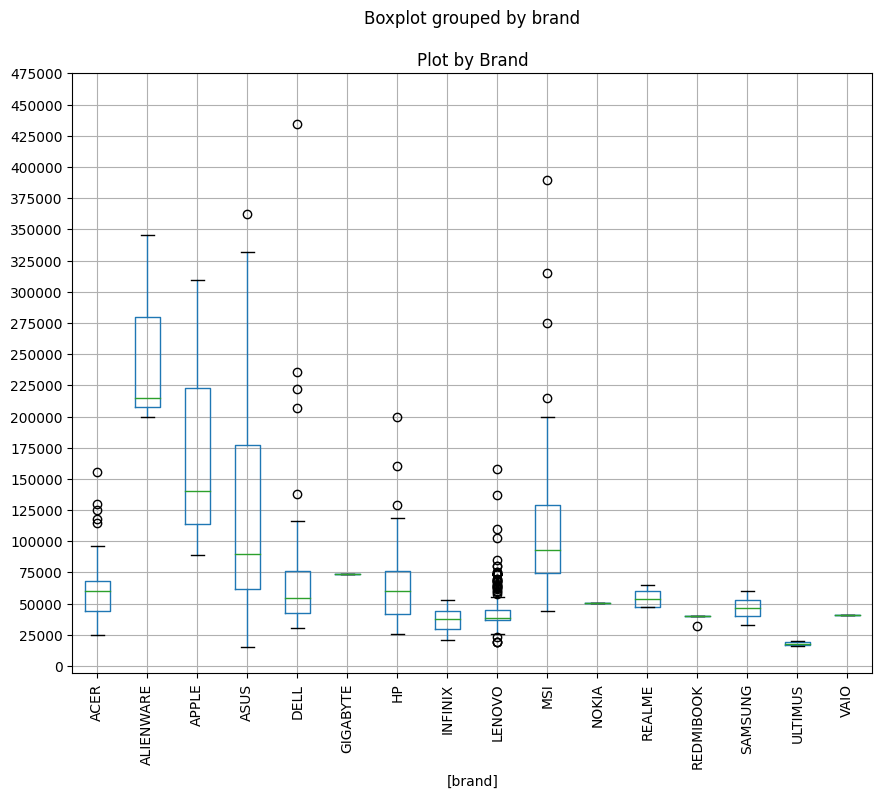

In [28]:
df.boxplot(column=[yaxis], by=['brand'], figsize=(10, 8))
plt.title('Plot by Brand')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Plot by OS

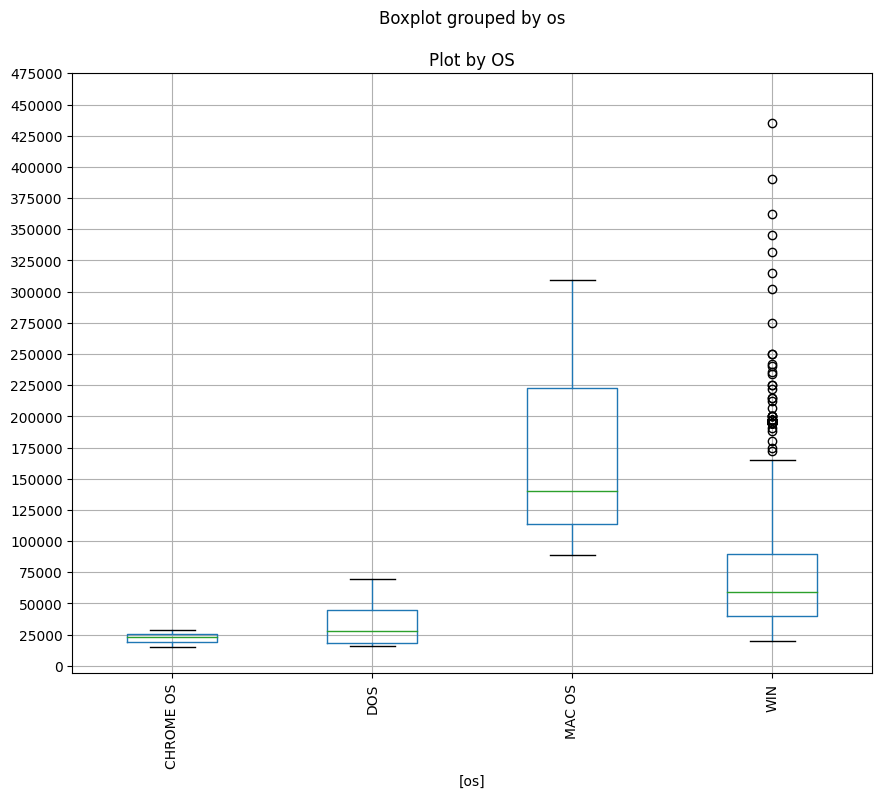

In [29]:
df.boxplot(column=[yaxis], by=['os'], figsize=(10, 8))
plt.title('Plot by OS')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Plot by CPU

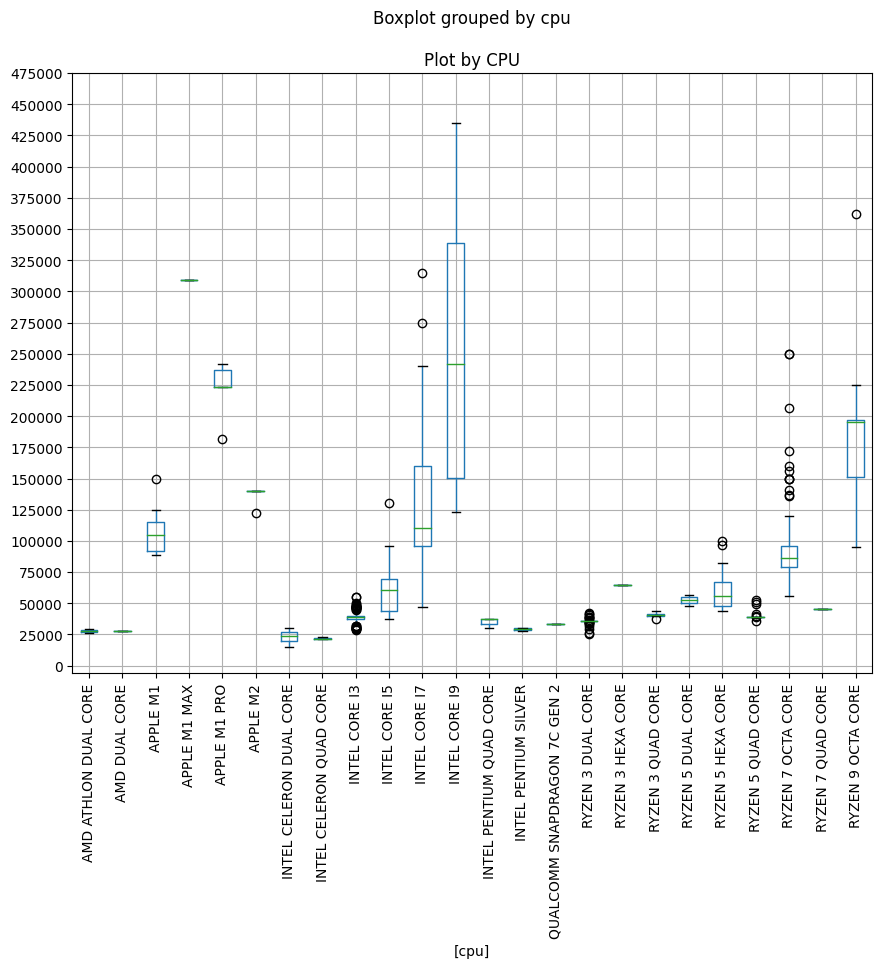

In [30]:
df.boxplot(column=[yaxis], by=['cpu'], figsize=(10, 8))
plt.title('Plot by CPU')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Plot by RAM space

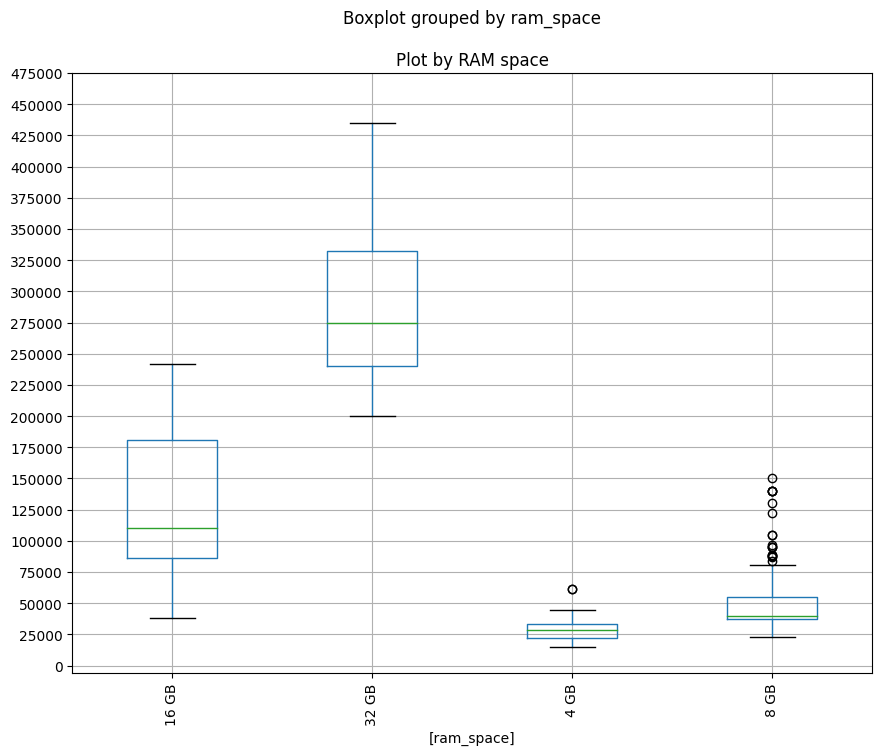

In [31]:
df.boxplot(column=[yaxis], by=['ram_space'], figsize=(10, 8))
plt.title('Plot by RAM space')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Plot by RAM type

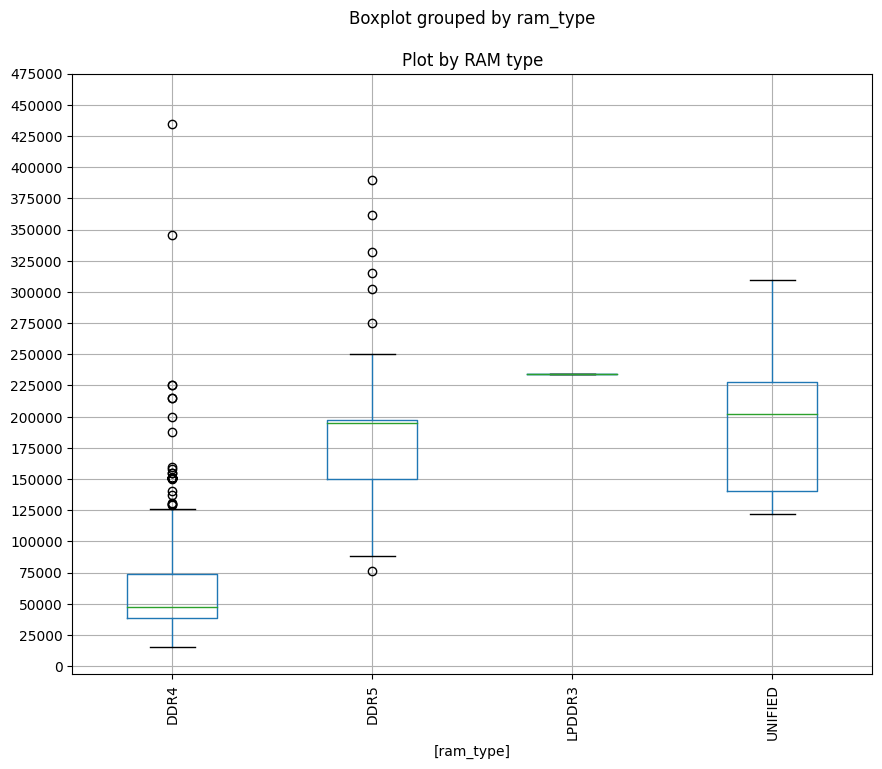

In [32]:
df.boxplot(column=[yaxis], by=['ram_type'], figsize=(10, 8))
plt.title('Plot by RAM type')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Plot by storage space

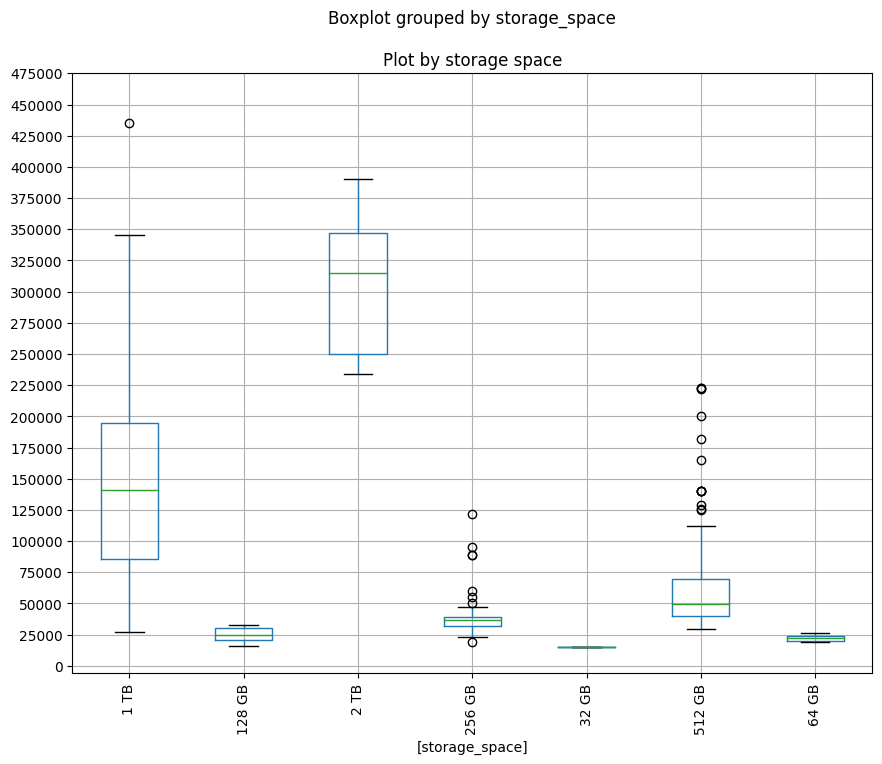

In [33]:
df.boxplot(column=[yaxis], by=['storage_space'], figsize=(10, 8))
plt.title('Plot by storage space')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Plot by storage type

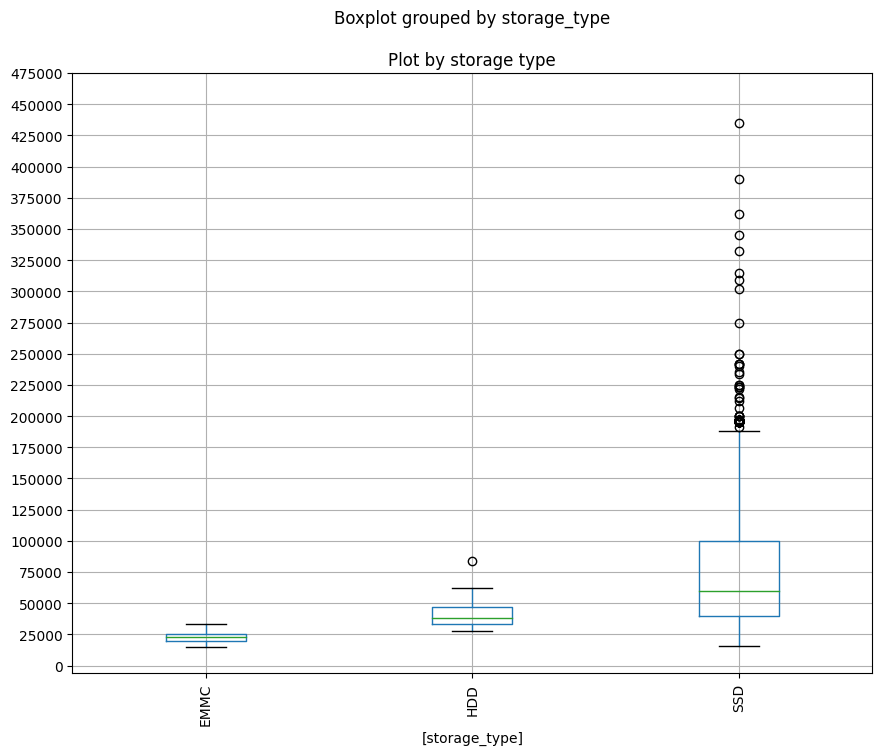

In [34]:
df.boxplot(column=[yaxis], by=['storage_type'], figsize=(10, 8))
plt.title('Plot by storage type')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Plot by display size

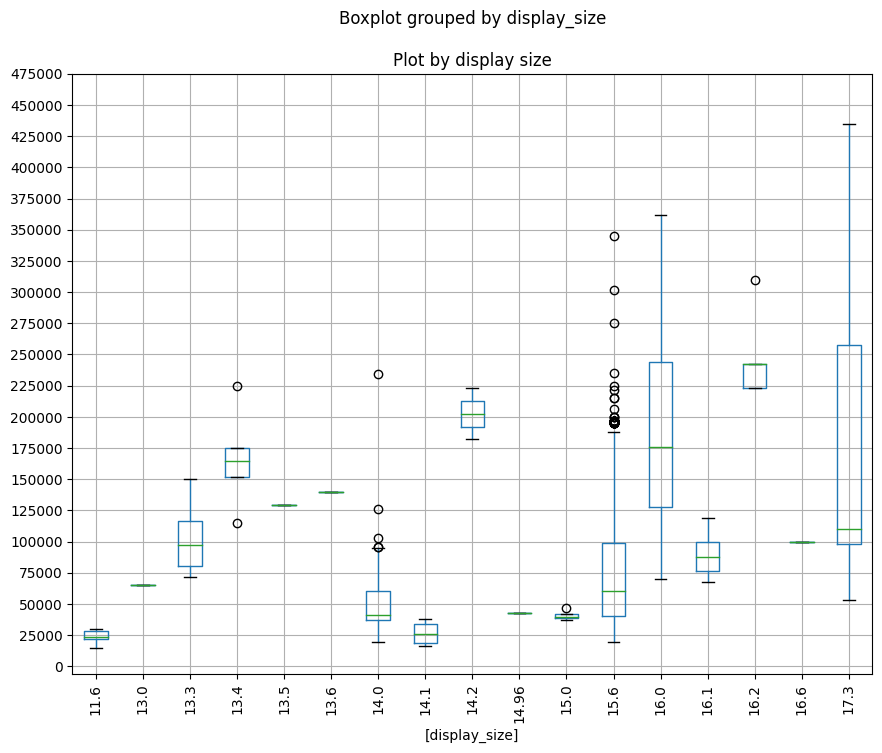

In [35]:
df.boxplot(column=[yaxis], by=['display_size'], figsize=(10, 8))
plt.title('Plot by display size')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Plot by screen touch

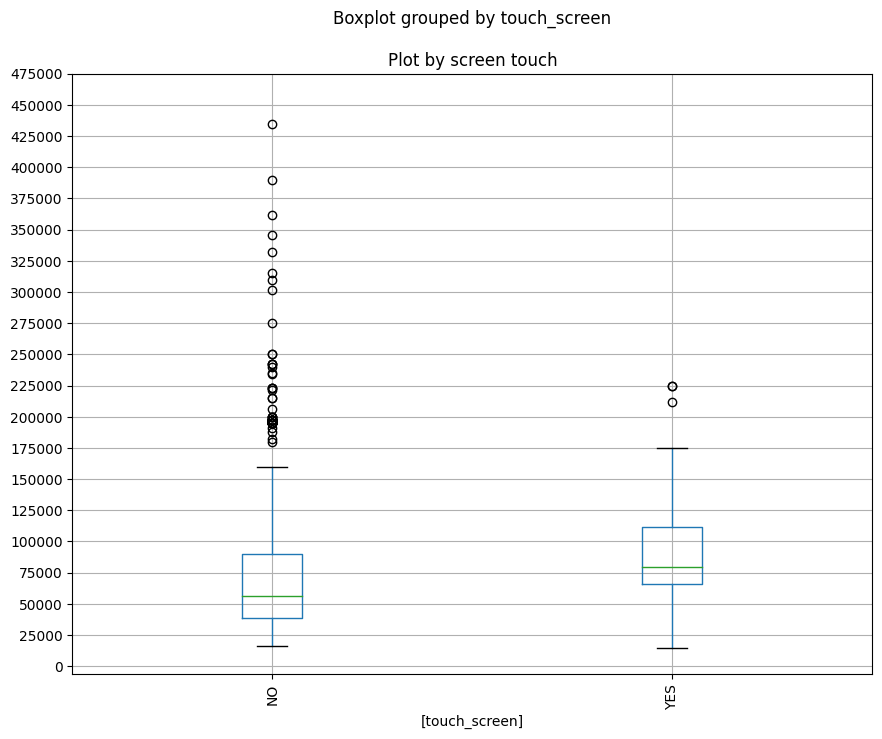

In [36]:
df.boxplot(column=[yaxis], by=['touch_screen'], figsize=(10, 8))
plt.title('Plot by screen touch')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

##### Warranty

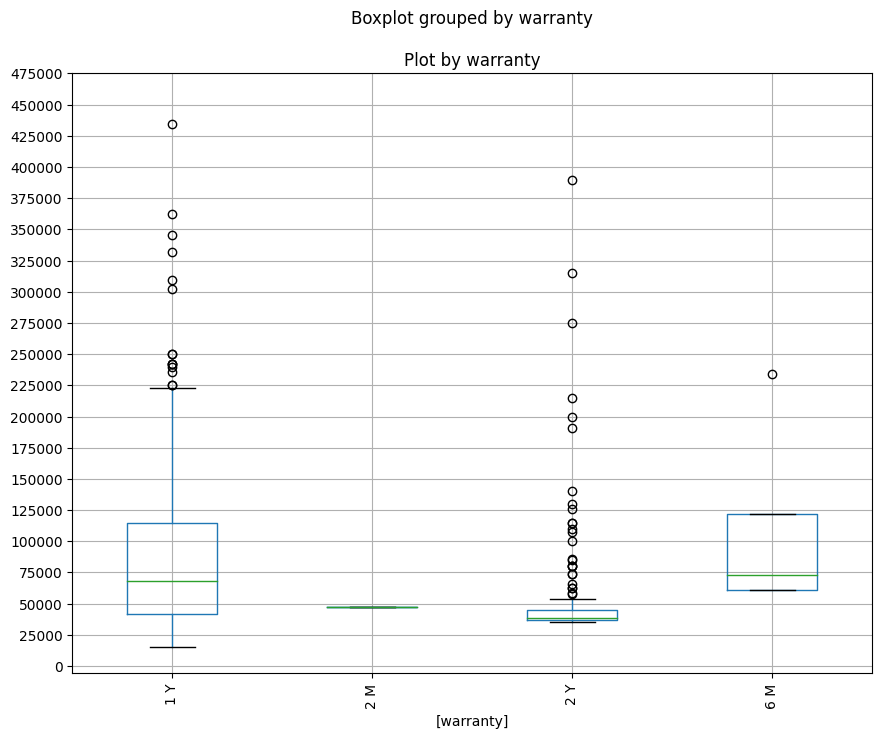

In [37]:
df.boxplot(column=[yaxis], by=['warranty'], figsize=(10, 8))
plt.title('Plot by warranty')
plt.xticks(rotation=90)
plt.yticks(range(0, 500000, 25000))
plt.show()

#### Price histogram plot

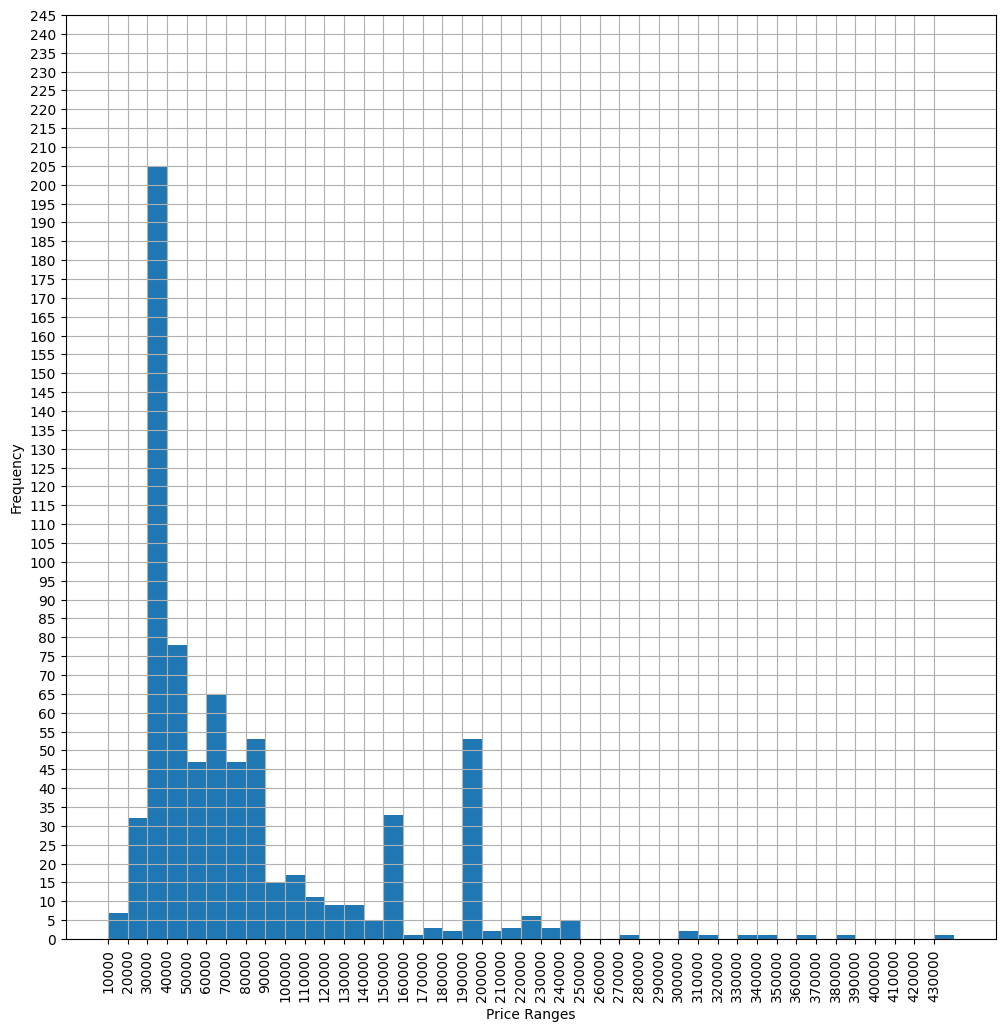

In [38]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.hist(df['mrp'], bins=43, range=(10000, 440000))
plt.yticks(range(0,250,5))
plt.xticks(range(10000, 440000, 10000), rotation=90)
plt.grid(True)
plt.xlabel('Price Ranges')
plt.ylabel('Frequency')
plt.show()

- Most laptops lie in the price range of Rs 30k to Rs 40k.
- Very few laptops go above Rs 2 lakh.

#### Brand vs Price
- Most brands keep their cheapest laptops above 25k.
- For most brands, most of their laptop prices bottoms at 50k.
- Many brands target a broad price range.
- ALIENWARE laptops are gaming laptops so are costlier, but apart from them, laptop prices for the majority is below Rs. 2.25 lakh.
- APPLE is reputed to make costly devices, so if they are not considered, majority of laptop price tops at almost Rs. 1.75 lakh.

#### OS vs Price
- WIN is Windows OS. Windows laptops are targeted to a very broad price range.
- In contrast, Chrome OS is used in extremely cheap laptops.
- The costliest laptops use Windows.
- macOS is proprietary to Apple and should not be considered. They are used only in Apple laptops.

#### OS frequency plot

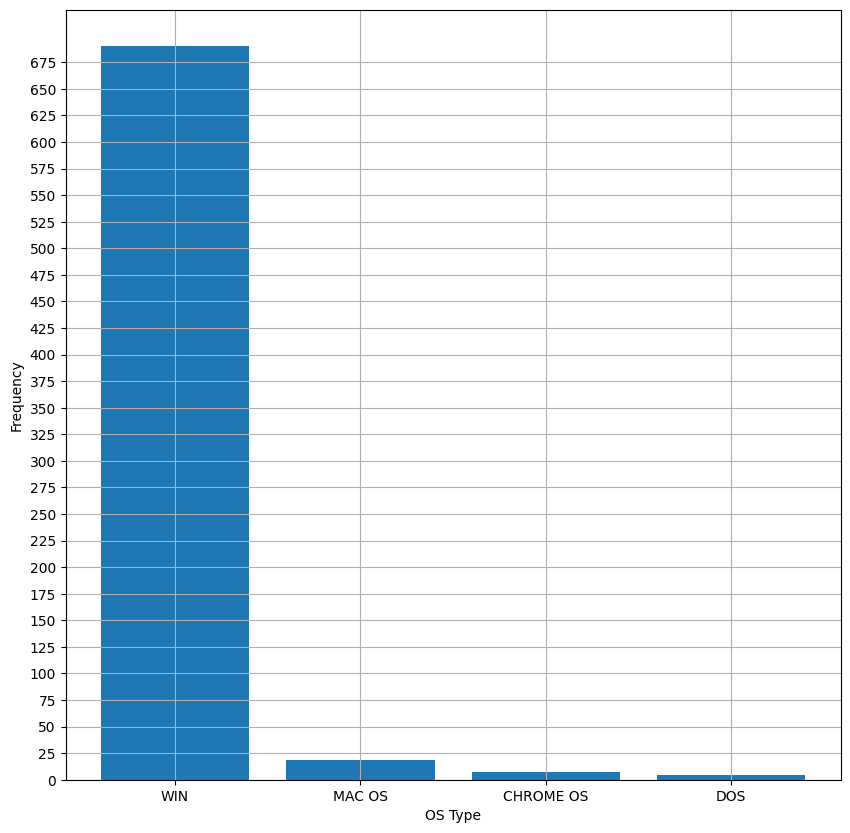

In [39]:
freq = df['os'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(freq.index, freq.values)
plt.yticks(range(0,700,25))
plt.xticks(rotation=0)
plt.grid(True)
plt.xlabel('OS Type')
plt.ylabel('Frequency')
plt.show()

This plot shows the frequency in which OSs are used.

#### CPU vs Price
- AMD, Ryzen 3 Dual Core and Intel Celeron are used in cheap laptops. Combine that with the OS factor and one can say Chrome OS laptops can use AMD, Ryzen 3 Dual Core or Intel Celeron chips.
- Intel Core i3 used in Rs 25k to Rs 60k. One can say, Chrome OS laptops can use Intel Core i3.
- Intel Core i5 used in Rs 30k to Rs 1 lakh.
- Intel Core i7 used in Rs 50k to Rs 2.4 lakh.
- Intel Core i9 used in Rs 1.25 lack to 4.4 lakh.

#### CPU frequency plot

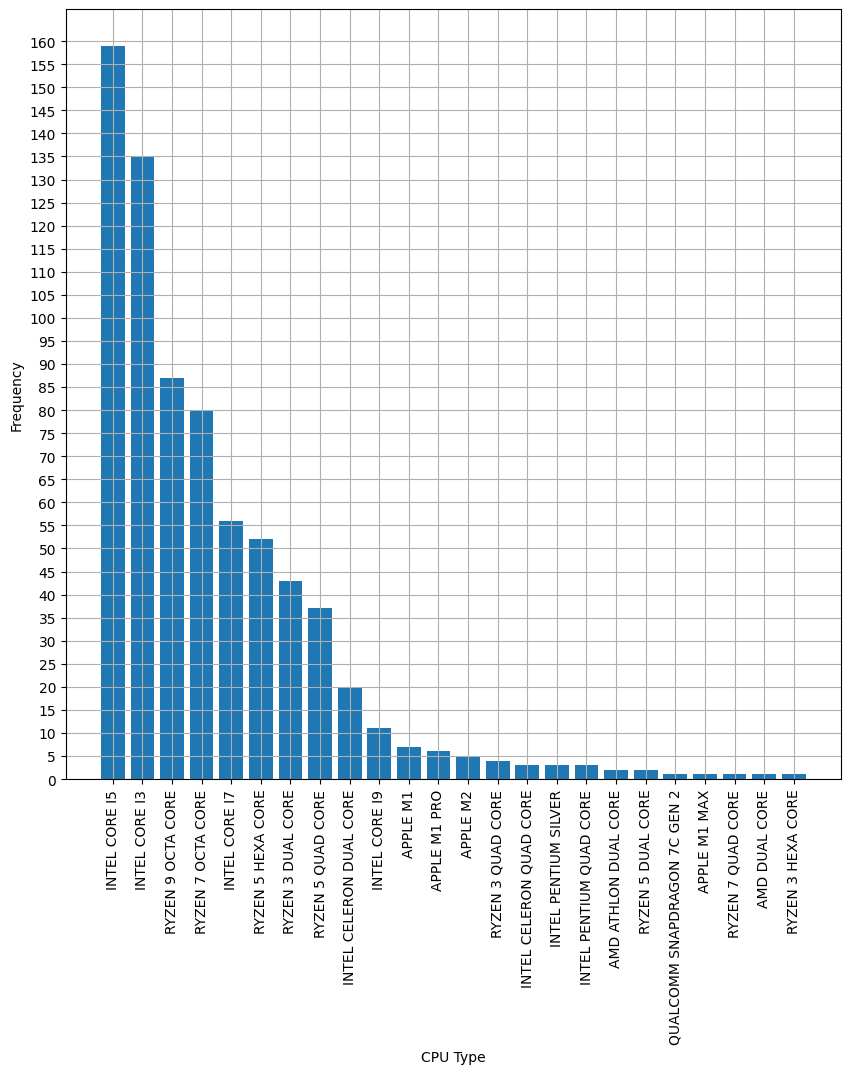

In [40]:
freq = df['cpu'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(freq.index, freq.values)
plt.yticks(range(0,165,5))
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel('CPU Type')
plt.ylabel('Frequency')
plt.show()

This plot shows the frequency in which CPUs are used.

#### CPU vs OS

<Axes: xlabel='cpu'>

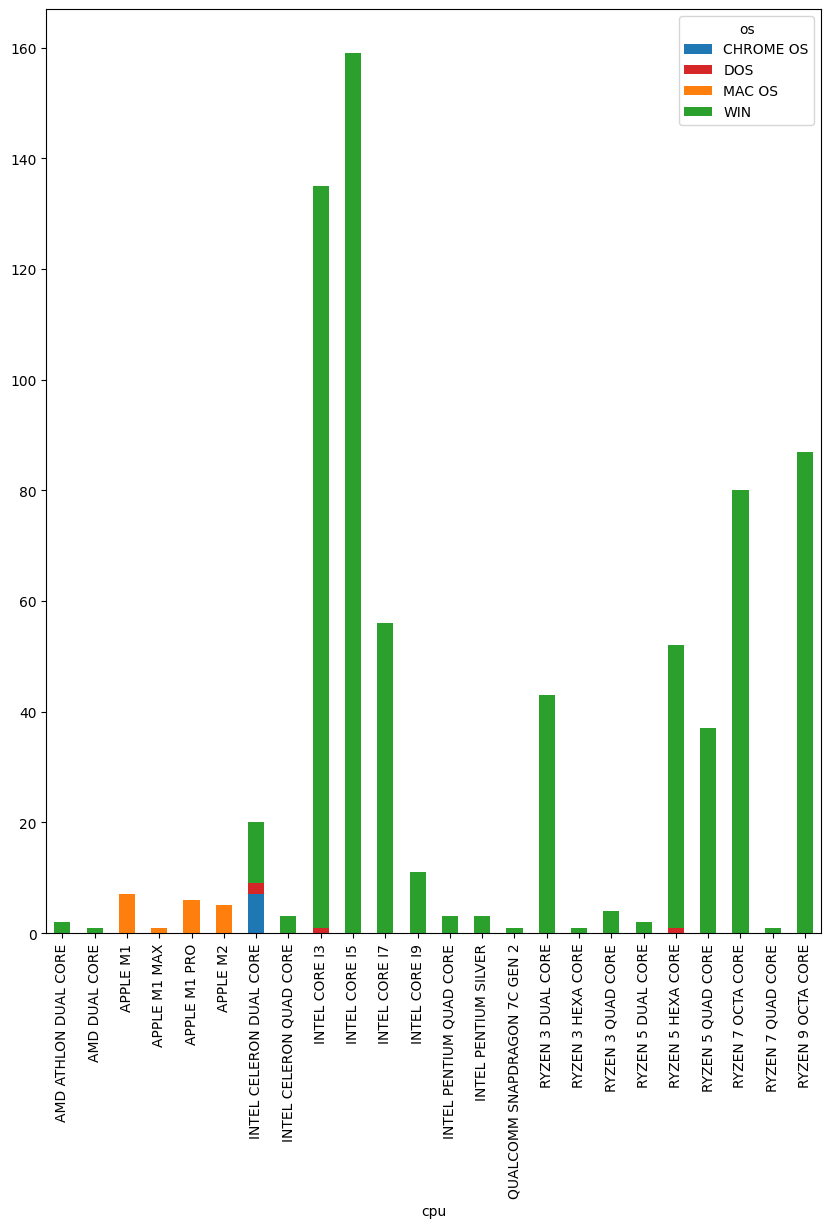

In [41]:

import seaborn as sns

freq_table = pd.crosstab(df['cpu'], df['os'])
colors = [
    '#1F77B4',
    '#D62728',
    '#FF7F0E',
    '#2CA02C'
]
freq_table.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 12),
    color=colors
)

We see that Windows has been used with most CPUs which is expected given how Windows functions with all kinds of hardware.

However, Apple chips are exclusively used with macOS.

#### RAM vs Price

##### RAM Size
- Minimum laptop price increases with RAM space.
- Larger RAM spaces are used in broader price ranges.
- Chrome OS laptops most likely use 4 GB RAMs.

##### RAM type
- DDR4 is used is cheaper laptops (and Chrome OS laptops).
- DDR5 maybe used in higher end (and costlier laptops i.e. Rs 75k+).
- Surprisingly, even though LPDDR3 is older tech, it's used in costlier laptops.
- LPDDR3 is a low power RAM tech meant for laptops. It's only used in one laptop in the dataset. This it was removed as an outlier.
- Unified Memory is used only in Apple laptops and require specially designed hardware. Also, Apple laptops are very costly, therefore unified design is only used in costly (Rs 1.25k+) laptops.

In [42]:
df[df['ram_type'] == 'LPDDR3']

,product,rating,mrp,feature,brand,ram_space,storage_space,os,storage_type,ram_type,cpu,display_size,touch_screen,warranty
712,ASUS EXPERTBOOK ...,4.5,233990.0,INTEL CORE I7 PR...,ASUS,16 GB,2 TB,WIN,SSD,LPDDR3,INTEL CORE I7,14.0,NO,6 M


In [43]:
df['feature'][712]

'INTEL CORE I7 PROCESSOR (10TH GEN)16 GB LPDDR3 RAM64 BIT WINDOWS 10 OPERATING SYSTEM2 TB SSD35.56 CM (14 INCH) DISPLAY3 YEAR MANUFACTURER WARRANTY ON THE DEVICE AND 6 MONTHS MANUFACTURER WARRANTY ON INCLUDED ACCESSORIES FROM THE DATE OF PURCHASE'

While the ASUS EXPERTBOOK B9 came out in Jan 2021 and has very high end specs, it uses older RAM technology. It seems Asus tried to optimise power consumption for this laptop.

Gonna drop it coz of it's low number of samples.

In [44]:
df.drop(712, inplace=True)
df['ram_type'].unique()

array(['DDR4', 'DDR5', 'UNIFIED'], dtype=object)

#### RAM vs OS

##### RAM Size

In [45]:
freq_table = pd.crosstab(df['ram_space'], df['os'])
freq_table.head(5)

os,CHROME OS,DOS,MAC OS,WIN
ram_space,,,,
16 GB,0,0,7,255
32 GB,0,0,1,16
4 GB,7,3,0,27
8 GB,0,1,11,391


##### RAM Type

In [46]:
freq_table = pd.crosstab(df['ram_type'], df['os'])
freq_table.head(5)

os,CHROME OS,DOS,MAC OS,WIN
ram_type,,,,
DDR4,7,4,7,588
DDR5,0,0,0,101
UNIFIED,0,0,12,0


##### Notes
What we see here is that Windows laptops use varying RAM spaces. This is as expected since Windows laptops are used for a variety of purposes. In comparison Chrome OS require little RAM.

8 GB seems to be a standard size of RAM for multipurpose applications.

Regarding the type, DDR4 is most popular. Only Apple laptops use unified RAM.

#### RAM frequency plots

##### RAM Size

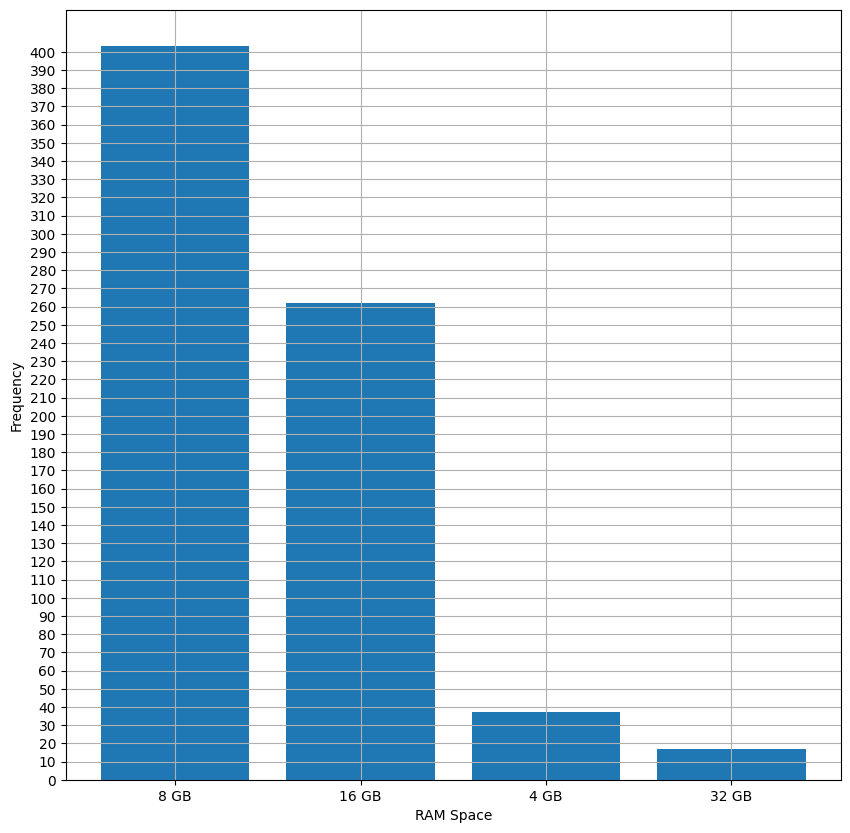

In [47]:
freq = df['ram_space'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(freq.index, freq.values)
plt.yticks(range(0,410,10))
plt.xticks(rotation=0)
plt.grid(True)
plt.xlabel('RAM Space')
plt.ylabel('Frequency')
plt.show()

##### RAM Type

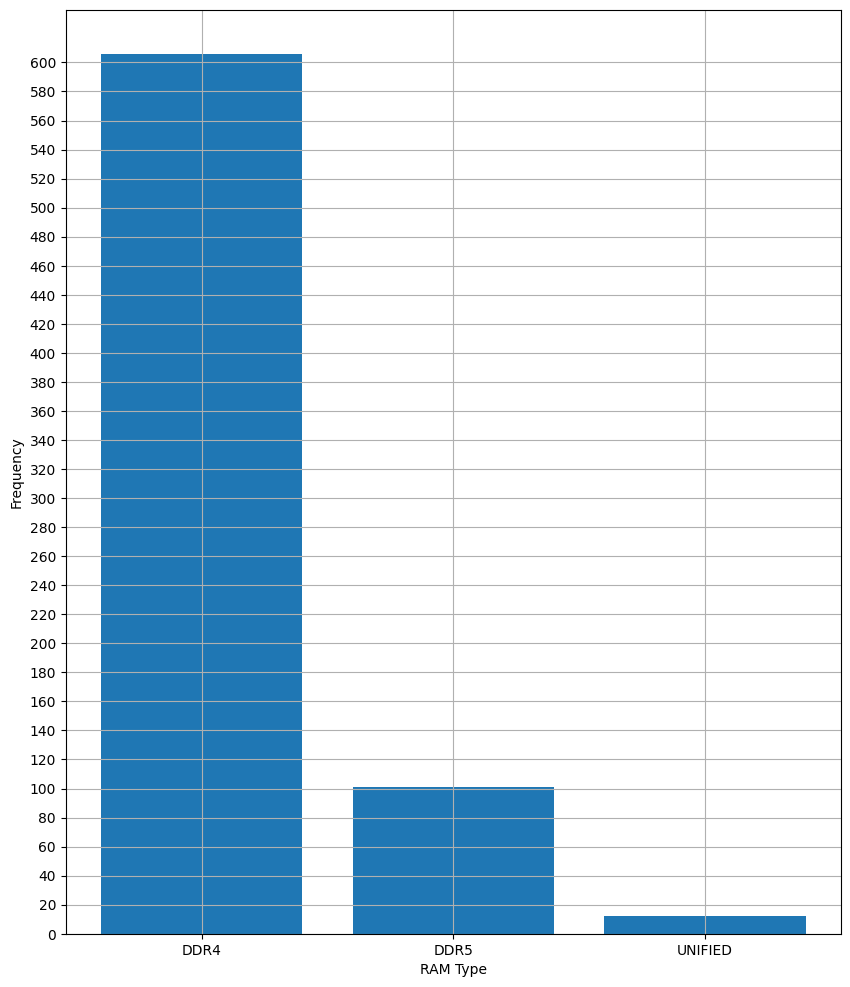

In [48]:
freq = df['ram_type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 12))
plt.bar(freq.index, freq.values)
plt.yticks(range(0,610,20))
plt.xticks(rotation=0)
plt.grid(True)
plt.xlabel('RAM Type')
plt.ylabel('Frequency')
plt.show()


#### Storage vs Price


- 512+ GB of storage is used in majority of laptops.
- Storage space <= 256 GB falls close to Rs 25k. The Chrome Books fall in this price range.
- Laptops with 1 TB storage occupy a broad price range, in comparison to other sizes.

#### Storage vs OS

#### Storage frequency plots

##### Storage Size

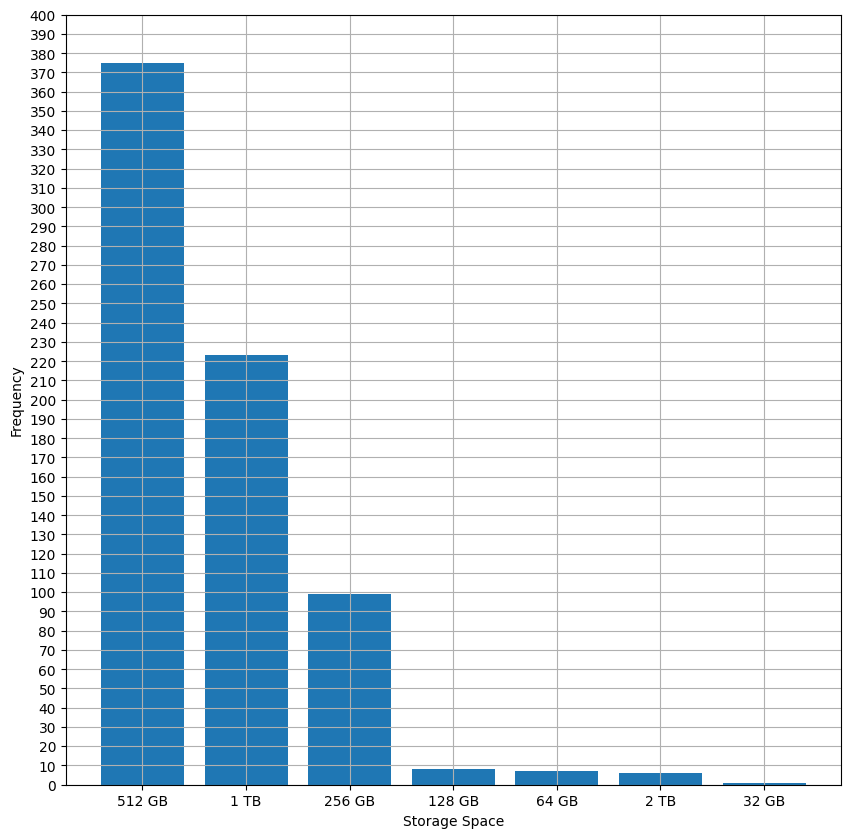

In [49]:
freq = df['storage_space'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(freq.index, freq.values)
plt.yticks(range(0,410,10))
plt.xticks(rotation=0)
plt.grid(True)
plt.xlabel('Storage Space')
plt.ylabel('Frequency')
plt.show()

##### Storage Type

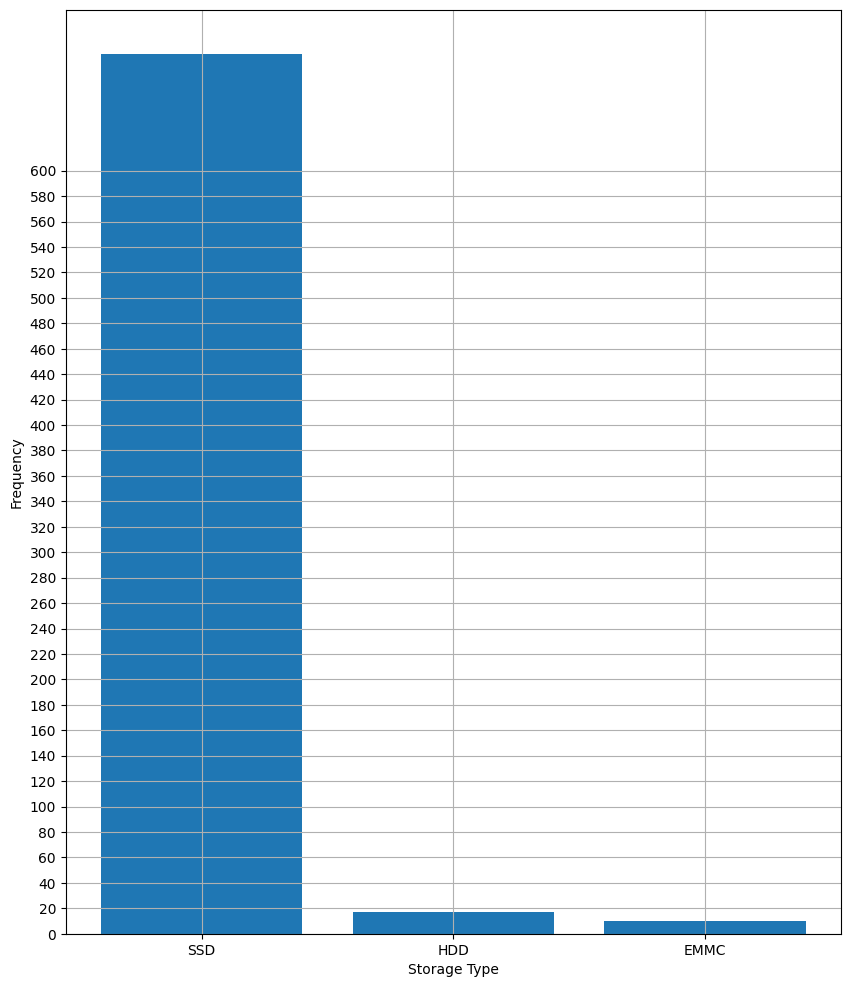

In [50]:
freq = df['storage_type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 12))
plt.bar(freq.index, freq.values)
plt.yticks(range(0,610,20))
plt.xticks(rotation=0)
plt.grid(True)
plt.xlabel('Storage Type')
plt.ylabel('Frequency')
plt.show()

#### Storage vs OS

##### Storage Size

In [51]:
freq_table = pd.crosstab(df['storage_space'], df['os'])
freq_table.head(5)

os,CHROME OS,DOS,MAC OS,WIN
storage_space,,,,
1 TB,0,0,5,218
128 GB,1,1,0,6
2 TB,0,0,0,6
256 GB,0,2,4,93
32 GB,1,0,0,0


##### Storage Type

In [52]:
freq_table = pd.crosstab(df['storage_type'], df['os'])
freq_table.head(5)

os,CHROME OS,DOS,MAC OS,WIN
storage_type,,,,
EMMC,7,0,0,3
HDD,0,0,0,17
SSD,0,4,19,669


##### Storage type vs size

In [53]:
freq_table = pd.crosstab(df['storage_type'], df['storage_space'])
freq_table.head(5)

storage_space,1 TB,128 GB,2 TB,256 GB,32 GB,512 GB,64 GB
storage_type,,,,,,,
EMMC,0,2,0,0,1,0,7
HDD,17,0,0,0,0,0,0
SSD,206,6,6,99,0,375,0


##### Notes
- EMMC is mostly used in Chrome OS.
- EMMC is suited for smaller storage sizes.
- EMMC is associated with cheaper prices and is used by Chrome OS.
- SSDs are suitable for multipurpose applications.

#### Warranty vs Price
- Most laptops get 6 M to 1 Y warranty
- Costlier laptops get warranty of 1 to 2 years.

#### Screen Touch vs Price
- Apparently availability of a touch screen doesn't affect price that much.
- Costlier laptops don't come with screen touch. This may be because costlier laptops are very specific with their use cases like gaming, and gamers prefer sophisticated input devices over a touch screen.
- Then touch screen is more suitable for laptops that will be used for a large variety of tasks.

#### Touchscreen frequency plot

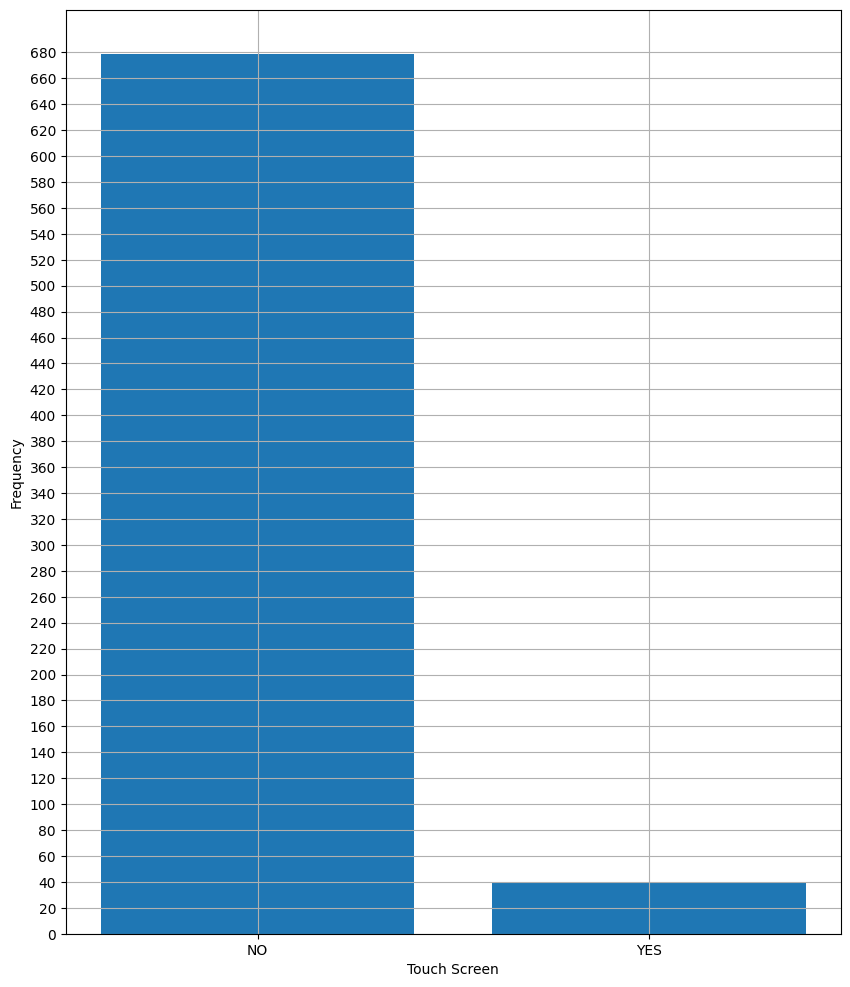

In [54]:
freq = df['touch_screen'].value_counts()
fig, ax = plt.subplots(figsize=(10, 12))
plt.bar(freq.index, freq.values)
plt.yticks(range(0,700,20))
plt.xticks(rotation=0)
plt.grid(True)
plt.xlabel('Touch Screen')
plt.ylabel('Frequency')
plt.show()

Apparently very few laptops use a touchscreen.

#### CPU vs Touch Screen

<Axes: xlabel='cpu'>

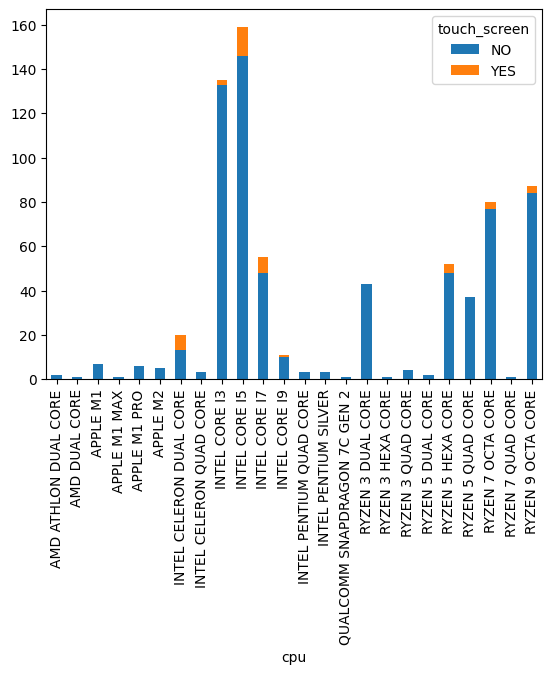

In [55]:
freq_table = pd.crosstab(df['cpu'], df['touch_screen'])
freq_table.plot(kind='bar', stacked=True)

Chrome OS uses Intel Celeron Dual Core chips. And apparently they have touchscreens.

Chrome OS is known to target multiple uses through web apps.

The number of laptops with touchscreen decreased from Intel Core i5 to i9.

Similar trend is seen in Ryzen 5 Hexa Core, 7 Octa Core and 9 Octa Core.

One might say, few higher end laptops use touch screens.

# ML Model

## Outlier treatment

In [56]:
df['mrp'].describe()

count       719.000000
mean      81393.898470
std       61332.348741
min       14990.000000
25%       38994.500000
50%       59990.000000
75%       94990.000000
max      434830.000000
Name: mrp, dtype: float64

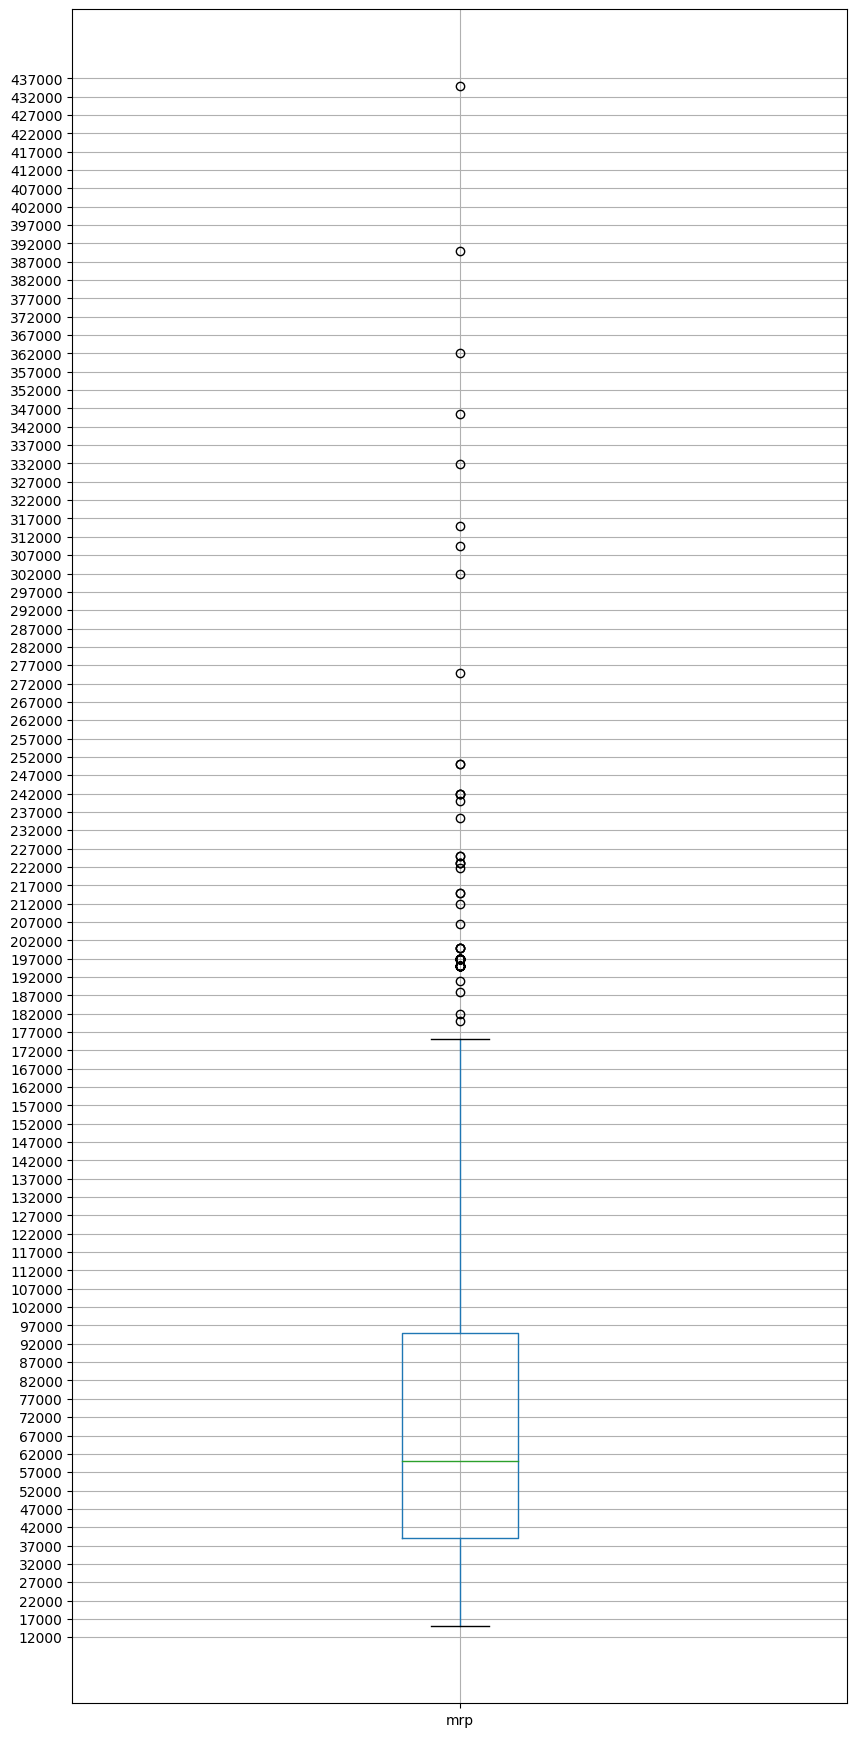

In [57]:
df.boxplot(column=['mrp'], figsize=(10,22))
plt.yticks(range(12000, 440000, 5000))
plt.grid(True)
plt.show()

(10996.75, 290974.25)


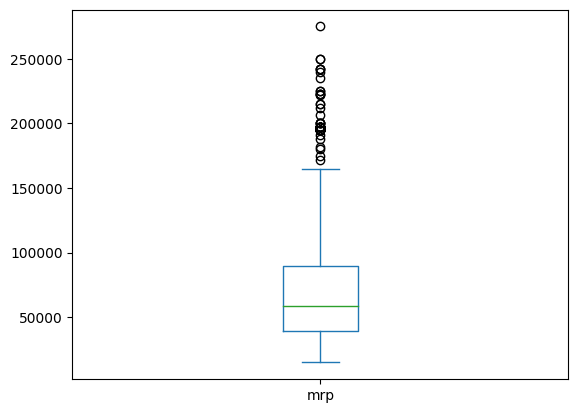

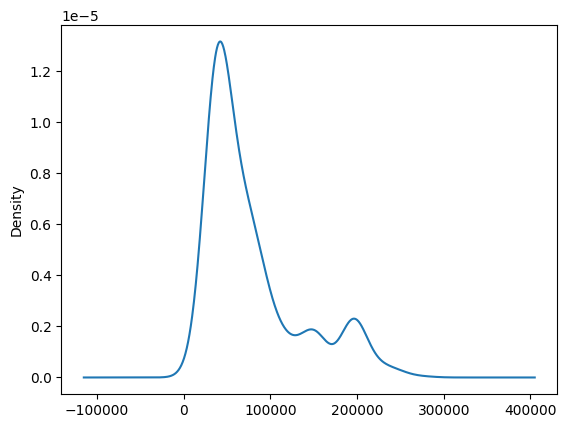

In [58]:
import math
q1 = df['mrp'].quantile(0.25)
q3 = df['mrp'].quantile(0.75)
IQR = q3 - q1

m_min = q1 + (-0.5) * IQR
m_max = q3 + (+3.5) * IQR

print((m_min, m_max))

mrp_ot = df[
    (m_min <= df['mrp']) & (df['mrp'] <= m_max)
]['mrp']
mrp_ot.plot(kind='box')
plt.show()
mrp_ot.plot(kind='kde')
plt.show()

## Saving clean data

In [59]:
df_cleaned = df.drop('rating', axis=1).drop('product', axis=1).drop('feature', axis=1).drop('brand', axis=1)
df_cleaned['mrp'] = mrp_ot
df_cleaned = df_cleaned.dropna()
df_cleaned.to_csv('/content/drive/MyDrive/Documents/CSV/laptop_details_cleaned.csv')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mrp            711 non-null    float64
 1   ram_space      711 non-null    object 
 2   storage_space  711 non-null    object 
 3   os             711 non-null    object 
 4   storage_type   711 non-null    object 
 5   ram_type       711 non-null    object 
 6   cpu            711 non-null    object 
 7   display_size   711 non-null    object 
 8   touch_screen   711 non-null    object 
 9   warranty       711 non-null    object 
dtypes: float64(1), object(9)
memory usage: 61.1+ KB


## Feature categorical list

In [60]:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        print(f"{column}:\n{'-' * len(column)}")
        print('\n'.join(df_cleaned[column].unique()))
        print('\n')

ram_space:
---------
8 GB
16 GB
4 GB
32 GB


storage_space:
-------------
256 GB
512 GB
1 TB
128 GB
64 GB
32 GB
2 TB


os:
--
WIN
MAC OS
DOS
CHROME OS


storage_type:
------------
SSD
EMMC
HDD


ram_type:
--------
DDR4
DDR5
UNIFIED


cpu:
---
INTEL CORE I3
RYZEN 5 HEXA CORE
INTEL CORE I5
RYZEN 7 QUAD CORE
RYZEN 5 QUAD CORE
RYZEN 9 OCTA CORE
RYZEN 7 OCTA CORE
APPLE M1
INTEL CELERON DUAL CORE
RYZEN 3 DUAL CORE
AMD ATHLON DUAL CORE
RYZEN 3 QUAD CORE
APPLE M2
INTEL CELERON QUAD CORE
INTEL CORE I7
APPLE M1 PRO
QUALCOMM SNAPDRAGON 7C GEN 2
INTEL PENTIUM SILVER
INTEL CORE I9
RYZEN 5 DUAL CORE
INTEL PENTIUM QUAD CORE
AMD DUAL CORE
RYZEN 3 HEXA CORE


display_size:
------------
14.0
15.6
17.3
13.3
14.2
13.6
16.0
16.1
16.2
14.1
13.4
11.6
15.0
13.0
14.96
13.5
16.6


touch_screen:
------------
NO
YES


warranty:
--------
2 Y
1 Y
6 M
2 M




## ML Training

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_cleaned = pd.read_csv('/content/drive/MyDrive/Documents/CSV/laptop_details_cleaned.csv')

df_sel = pd.get_dummies(
    df_cleaned,
    columns=['os', 'cpu', 'ram_space', 'ram_type', 'storage_space', 'storage_type', 'touch_screen', 'warranty', 'display_size']
)

X_train, X_test, y_train, y_test = train_test_split(df_sel.drop('mrp', axis=1), df_sel['mrp'], test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)

print(f'R² = {r2:.4f}')

R² = 0.9335


In [62]:
y_pred = model.predict(X_test)
X_test = np.arange(0,len(X_test),1)
print(X_test.shape, y_test.shape)
print(y_pred.shape)

(143,) (143,)
(143,)


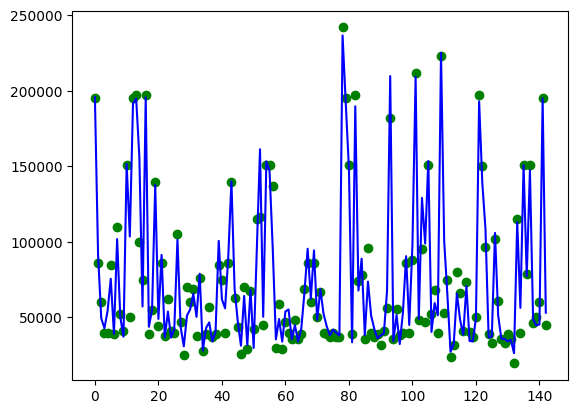

In [63]:
plt.scatter(X_test, y_test, color ='green')
plt.plot(X_test, y_pred, color ='blue')
plt.show()

In [64]:
import pickle

filename = '/content/drive/MyDrive/Documents/ML-Models/lappy_price_predictor.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)

def predict_price(features):
    df = pd.DataFrame(features, index=[0])
    df = pd.get_dummies(df, columns=['os', 'cpu', 'ram_space', 'ram_type', 'storage_space', 'storage_type', 'touch_screen', 'warranty', 'display_size'])
    missing_cols = set(X_train.columns) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    df = df[X_train.columns]
    return model.predict(df)[0]

In [65]:
features = {
    'os': 'MAC OS',
    'cpu': 'APPLE M1',
    'ram_space': '16 GB',
    'ram_type': 'DDR4',
    'storage_space': '1 TB',
    'storage_type': 'SDD',
    'touch_screen': 'NO',
    'warranty': '1 Y',
    'display_size': '13.0'
}

print(f"predicted price: {predict_price(features)}")

predicted price: 132740.1582758249
